# Bandits and gridworlds

Franz Wurm


This is the code for the practical session in the course "2122-S2 Reinforcement Learning & Decision-Making: Computational & Neural Mechanisms" [(link to Brightspace)](https://brightspace.universiteitleiden.nl/d2l/home/134708)

**Useful references**
- Sutton, R. S., & Barto, A. G. (2018). Reinforcement learning: An introduction. MIT press.

## Goal of this practical

In this practical, you are going to implement a reinforcement learning algorithm for two standard problems.

In the [bandit problem](https://en.wikipedia.org/wiki/Multi-armed_bandit), the agent is faced with a choice between two options. Named after slot machines in a casino, our two-armed version helps to demonstrate the the two core principles that allow the agent to achieve his goal of reward maximzation. 

Afterwards, we will also investigate reinforcement learning in a more realistic context. In the gridworld problem, the agent is again faced with choices between different options. However, in contrast to the bandit task, choices are sequential, feedback is scarce and the state space big. This poses a bigger problem for learning in the gridworld.


## The bandit problem

As discussed in the lecture, the two principles of reinforcement learning are
- the learning rule: updating of expectations based on observations 
- decision rule: taking actions based on expectations

### Decision rule

The decision rule (or policy) defines the agent's way of behaving at a given time or state. Put differently, the policy is a mapping between states and actions and it corresponds to what psychologists sometimes call a stimulus-response association.

During the lecture, we introduced a few different decision rules and of course the list in not exhaustive.
- random method
- greedy method
- e-greedy method
- softmax method

Let's have a closer look at the softmax rule, as this is maybe the most widely used decision rule in the neuroscientific literature.

$\LARGE p(a)= \frac{e ^{(\beta * Q(a))}} {\sum \limits _{a'} e ^{(\beta * Q(a'))}}$ 


In [52]:
softmax = function(Q,beta) {
  p = exp(beta * Q) / sum(exp(beta * Q))
  return(p)
}

Putting this softmax function to use, we need to make a few hypothetical assumptions for our bandit task.

For example, let's assume our agent has played the slot machine twice, each arm one time. The left arm lead to a reward (1), whereas the right arm did not result in a reward (0). We can translate this experience into simplified expectations (Q values) for the next game.

In [53]:
actions = c("left","right")
Qdummy = c(1,0)
beta = 1

p = softmax(Qdummy,beta)

cat('beta: ')
print(beta)
cat('Expectations: ')
print(Qdummy)
cat('Probabilities: ')
print(p)

beta: [1] 1
Expectations: [1] 1 0
Probabilities: [1] 0.7310586 0.2689414


We can see, that the dummy expectations translate into action probabilites in a straightforward way. The highest value has the highest action probability.

**Question**: So what is the role of beta in this softmax function?

You can write your answers below and discuss it with your colleagues.

In [70]:
# what is the role of beta in the softmax function?
# (you can change this code block to markdown)







Once you have answered the above question, you can play around with the beta value and observe the changes!

You will see, that beta (or 'inverse temperature') affects the so-called [gain](https://en.wikipedia.org/wiki/Gain_(electronics)). The higher the gain, the more pronounced the differences in action values get translated into action probabilities.

We can plot this in a systematic way.
Try to understand what is plotted on the x and y axis, and how the different betas relate.

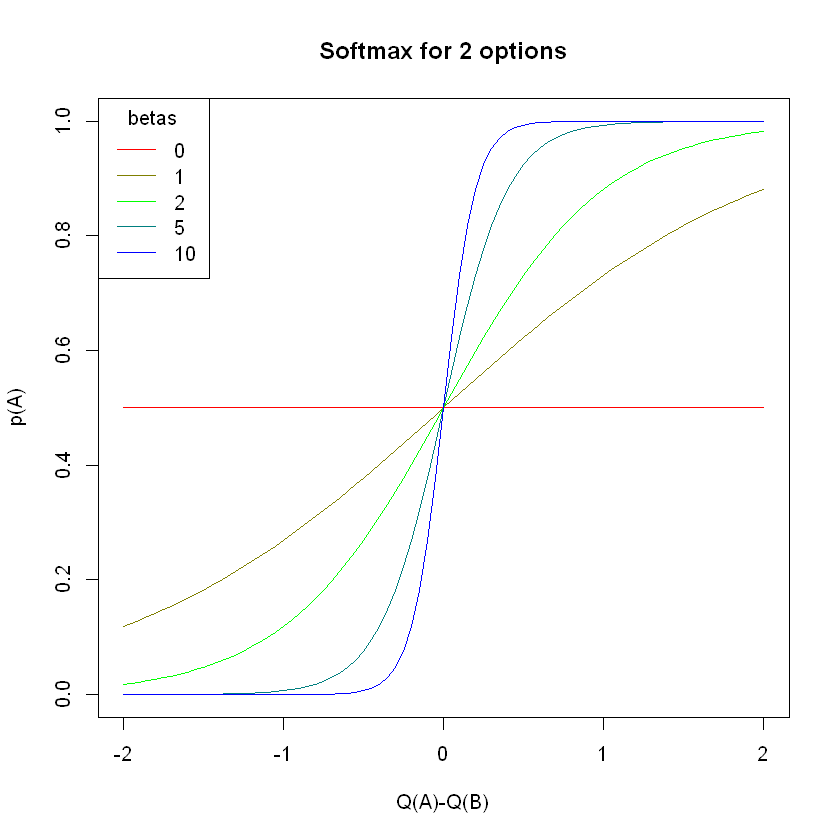

In [54]:
plot(NA, ylim = c(0, 1), xlim = c(-2, 2), main = "Softmax for 2 options",
     xlab = "Q(A)-Q(B)",
     ylab = "p(A)") #better view over the lines
x = seq(-2,2,0.05)
betas = c(0,1,2,5,10)
mypal <- colorRampPalette( c( "red", "green", "blue") )( length(betas) )
for (i in 1:length(betas)) {
  y = integer(length(x))
  for (j in 1:length(x)){
    p = softmax(Qdummy*x[j],betas[i])
    y[j] = p[1]
  }
  lines(x,y, type = "l", col = mypal[i], , lwd=1.5) #thickness set to be higher
}
legend("topleft", legend=as.character(betas), lwd = 1,col=mypal,title='betas')

As a next step, we finally want to introduce some action.

Before we can make a decision, we need to define a reward and action function.

- In the reward function, we specify the consequences of each possible actions.
- In the action function, we simply determine the action taken based on the probabilities from the softmax function.

In [55]:
getReward_bandit = function(action) {
    luck = runif(1)
    if (action == "right") {
       if (luck > 0.3) {
           reward = 1
       }  else {
           reward = 0
       }
    } else if (action == "left") {
       if (luck > 0.7) {
           reward = 1
       }  else {
           reward = 0
       } 
    }
    outcome = list("luck" = luck,"reward" = reward)
    return(outcome)
}    

In [56]:
takeAction = function(values,options) {
    if (length(values) == length(options)) {
        p = softmax(values,beta)
        action = sample(options, size = 1, prob = p)
    } else {
        print('Values dont match options!')
    }
    return(action)
}

We can now test our code and perform some actions.

In [57]:
action = takeAction(Qdummy,actions)
reward = getReward_bandit(action)

print(action)
print(reward)

[1] "right"
$luck
[1] 0.4468408

$reward
[1] 1



You see that besides the action and the resulting reward I have also introduced a variable called "luck". While this is not a necessary variable, it helps us contrast a random agent from a learning agent.

First, let's have a look at a random decision maker.

As can be seen in the figure above, random action selection is a special case of the softmax method. If beta is set to zero, any existing difference between action values get egalized (remember: zero times something will always be zero...).

[1] "initial values"
[1] 0.5 0.5
[1] "total luck:  514.696208374342"
[1] "total reward:  527"
[1] "final values"
[1] 0.5 0.5


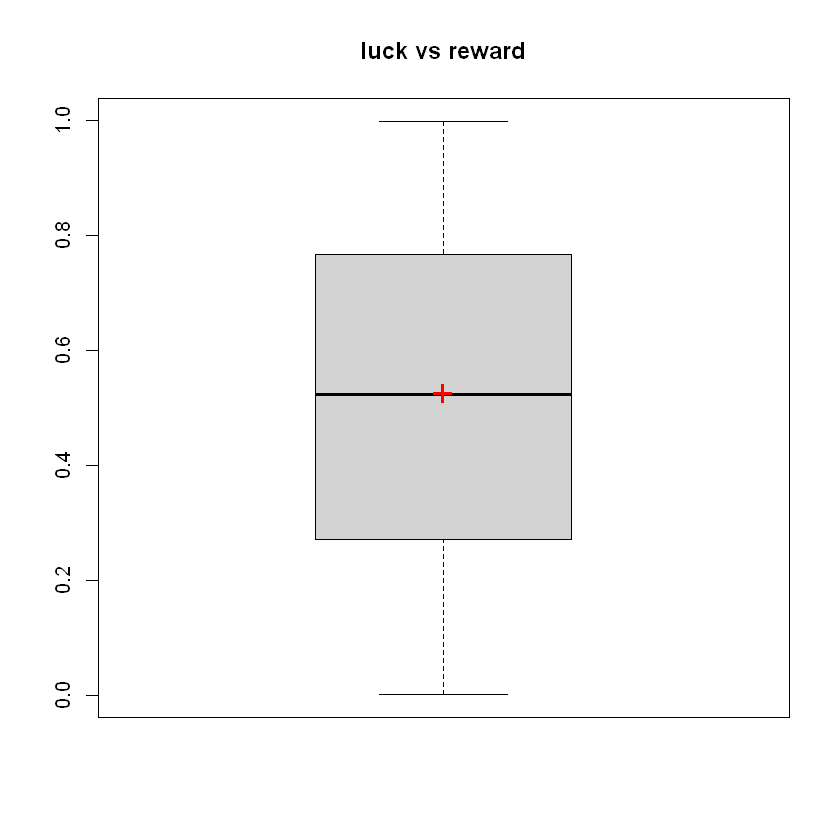

In [58]:
#Sequential actions of a naive agent
actions = c("left","right")
nTrial = 1000

Q = c(0.5,0.5)
print("initial values")
print(Q)

beta = 0

luck = array(NaN,nTrial)
reward = array(NaN,nTrial)
for (iT in 1:nTrial) {
    action = takeAction(Q,actions)
    outcome = getReward_bandit(action)
    luck[iT] = outcome$luck
    reward[iT] = outcome$reward
}
print(paste("total luck: ",sum(luck)))
print(paste("total reward: ",sum(reward)))

print("final values")
print(Q)

boxplot(luck, main="luck vs reward")
points(mean(reward), col="red", pch="+", cex=2)

The boxplot shows the range of the agent's luck. In line with out definition, it is evenly spaced between 0 and 1, no outliers. 

In red you see the mean reward.

As expected for a random agent, median luck and average reward are positively correlated.


### Learning rule

In a next step, we introduce the learning rule. This rule should help our agent to build up expectations about its environment, thereby leaving behind its dependence on luck.

Let's specify the learning rule in accordance with the simplified TD formula introduced in the lecture.

$\LARGE Q_{new}(a) = Q_{old}(a) + \alpha * PE$,

    where $\alpha$ is the learning rate,
    and PE is the prediction error.
    
The prediction error is calculated as the difference between obtained and expected reward
    
$\LARGE PE = R - Q_{old}(a)$

In [59]:
TDlearn_bandit = function(values,reward,action) {
    values[action] = values[action] + alpha * (reward - values[action])
    return(values)
}

[1] "initial values"
[1] 0.5 0.5
[1] "total luck:  492.616637164494"
[1] "total reward:  482"
[1] "final values"
[1] 0.2256951 0.6666204


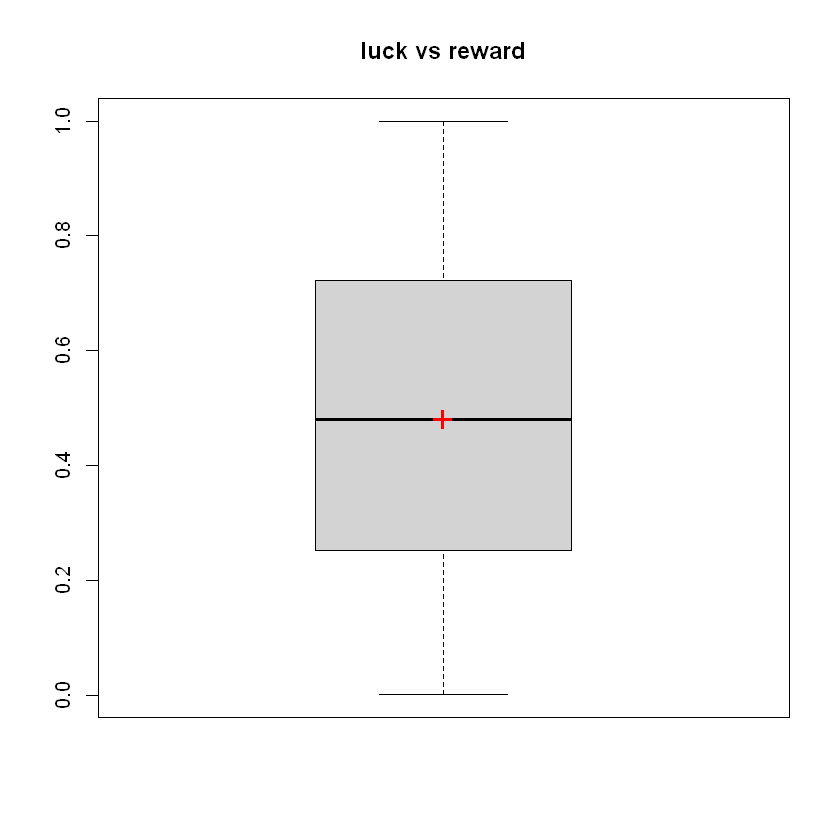

In [60]:
Q = c(0.5,0.5)
print("initial values")
print(Q)

alpha = 0.1

luck = array(NaN,nTrial)
reward = array(NaN,nTrial)
for (iT in 1:nTrial) {
    action = takeAction(Q,actions)   
    outcome = getReward_bandit(action)    
    luck[iT] = outcome$luck
    reward[iT] = outcome$reward
    
    #print(Q)
    #print(action)
    Q = TDlearn_bandit(Q,outcome$reward,which(actions==action))
}
print(paste("total luck: ",sum(luck)))
print(paste("total reward: ",sum(reward)))

print("final values")
print(Q)
boxplot(luck, main="luck vs reward")
points(mean(reward), col="red", pch="+", cex=2)

Again, the boxplot shows the range of experienced luck and the mean reward.

**Question**: Contrary to our expectations, the average reward is not significantly different from chance performance (see random agent above). Looking at the final expectations we can clearly see, that the environmental differences between options have been learned (right actions  have a higher reward probability than left action). So how come that this "knowledge" is not reflected in the decision-making and average reward?


In [ ]:
# why is performance for our learning agent not different from our random agent?
# (you can change this code block to markdown)






**Answer**: If we take a step back and have a look at the decision rule, we can see that the inverse temperature parameter is still fixed at 0. This means that there is perfect negative gain, and therefore differences in expectations get egalized during action selection.

Add a beta parameter, set it to 10 (positive gain) and have a look at the results!


**Excercise 1.** So far, when comparing our random and learning agent, the term "not significantly different from chance performance" is purely descriptive. In order to be able to make a stronger claim or inference, we could simulate multiple agents and compare our decision rules on the population level. Simulate multiple agents for each method by adding another loop. Store and plot the relevant metrics to show that learning agent truely outperform random agents. 

In [61]:
##############################
## code block for exercise 1 #



##############################

In [62]:
rm(list = ls()) #clear the workspace before we continue

### The grid world problem

*Grid worlds* are simplified respresentations of the environment, that are often used for navigation simulation. As is implied by the name, grid worlds break down the environment into a grid, similar to a chess board. For the scope of this course we are going to stick with a very basic 4x4 gridworld.

Before we dive further into the code, a bit more background information on gridworlds. 

Gridworlds are so-called [Markov Decision Processes](https://en.wikipedia.org/wiki/Markov_decision_process). In contrast to the previous bandit task, gridworlds usually are multi-step problems, meaning that actions executed in one state cannot only result in reward, but also affect the upcoming state. This necessitates the agent to not only consider the immediate reward but also the expected cumulative reward. 

Our agent always starts in the same start state (s_0, top left of board). From there, it will take *steps*, that gradually move him across the board. Movement is restricted to the cardinal directions (up, down, right, left). Reward is located in the terminal state (s_terminal, bottom right of board). Upon arrival at the site of reward, the agent receives the reward (associated with a positive value) and will be returned to the initial state, so the whole procedure can start again. The (time)steps between start and terminal state are regarded as a *run* (or *episode*). Start state, reward and terminal state do NOT change between runs. Thus, our gridworld environment is stable.

For this grid world example, we will implement the Q learning rule, which is defined as

$\LARGE Q_{new}(s,a) = Q_{old}(s,a) + \alpha * (R + \gamma max_{a} Q_{old}(s',a) - Q_{old}(s,a))$,

    where $\alpha$ is the learning rate,
    $\gamma$ is the discounting factor,
    and s' is the next state

Below, we define the most basic details for our gridworld.

In [63]:
# copied function from bandit
takeAction = function(values,options) {
    if (length(values) == length(options)) {
        p = softmax(values,beta)
        action = sample(options, size = 1, prob = p)
    } else {### The grid world problem

# copied function from bandit
softmax = function(Q,beta) {
  p = exp(beta * Q) / sum(exp(beta * Q))
  return(p)
}


In [64]:
grid_size = 4

s_0 <- 0 # start at initial state
s_terminal <- (grid_size^2)-1 # goal state
actions <- c("left", "up", "right", "down")

# assign numbers to each state in the gridworld
states = matrix(, nrow = grid_size, ncol = grid_size)
iZ = 0
for (iX in 1:grid_size) {
  for (iY in 1:grid_size) {
    states[iY, iX] = iZ
    iZ = iZ + 1
  }
}

print(paste("state state: ",s_0))
print(paste("final state: ",s_terminal))
print(states)

[1] "state state:  0"
[1] "final state:  15"
     [,1] [,2] [,3] [,4]
[1,]    0    4    8   12
[2,]    1    5    9   13
[3,]    2    6   10   14
[4,]    3    7   11   15


In [65]:
getReward_grid <- function(state) {
  if (state == s_terminal) {
    reward <- 100
  } else {
    reward <- -1
  }
  return(reward)
}

makeMove <- function(sin, ain) {
  sout = sin 
  coords = which(states == sin, arr.ind = TRUE)  
  if (ain == "down")
    coords[1] <- coords[1] + 1
  if (ain == "up")
    coords[1] <- coords[1] - 1
  if (ain == "right")
    coords[2] <- coords[2] + 1
  if (ain == "left")
    coords[2] <- coords[2] - 1
  
  if (coords[1] < 1)
    coords[1] = 1
  if (coords[1] > length(states[, 1]))
    coords[1] = length(states[, 1])
  if (coords[2] < 1)
    coords[2] = 1
  if (coords[2] > length(states[1, ]))
    coords[2] = length(states[1, ])
  
  sout = states[coords]  
  return(sout)
}

TDlearn_grid = function(values,reward,action,state,nextstate) {
    values[state,action] = values[state,action] + alpha * (reward + max(values[nextstate,]) - values[state,action])
    return(values)
}

Now that we have defined the most crucial parts for our grid world, we can put everything together.

For convenience, I have already added multiple agents, as this will allow us to draw more precise conclusions from the simulation data.

For the agent's parameters I have implemented very basic values. You can have a look how changing those parameters affects the performance in the grid world.

In [66]:
nAgent = 20
nRun = 100

alpha = 0.1
beta = 1

movecounter = matrix(0, nrow = nRun, ncol = nAgent)
Qall = array(0,c(grid_size^2, length(actions), nAgent))

for (iAgent in 1:nAgent) {
    
#     print(paste("agent ",iAgent))
    Q <- array(0, c(grid_size^2, length(actions)))

    for (iRun in 1:nRun) {
    
#         if (iRun %% 20 == 0) {
#           print(paste("   trial ",iRun))
#         }
    
        state <- s_0 # set cursor to initial state
        sidx = which(states == state)
    
        moves = 0   
        while (state != s_terminal) {
        
            action = takeAction(Q[sidx,],actions)
            next_state <- makeMove(state, action)
            reward <- getReward_grid(next_state)
        
            aidx = which(actions == action)
            s2idx = which(states == next_state)
            Q = TDlearn_grid(Q,reward,aidx,sidx,s2idx)
        
            response <- (list(state = next_state, reward = reward))

      
#             if ((iRun == 1) & (next_state == s_terminal))	{
#                print(paste("trial ",iRun))
#                print(Q) # what does q-look like after first successful iteration (i==1)
#             }
#             if ((iRun == nRun) & (next_state == s_terminal))	{
#                print(paste("trial ",iRun))
#                print(Q) # what does q-look like after first successful iteration (i==1)
#             }
          
            state <- response$state # move to next state
            sidx = which(states == state)
      
            moves = moves + 1
        }
        Qall[,,iAgent] = Q
        movecounter[iRun, iAgent] = moves
    }
}
#print(movecounter)

In order to better understand the agents' behavior in the gridworld we can again make use of the `print()` and `plot()` function.

**Question**: As a first step, lets have a look at the performance of our agent. Do you have any hypothesis about this?

In [ ]:
# what is your hypothesis?
# (you can change this code block to markdown)






**Answer**: Performance for learning agents should improve over time. Therefore we should expect to find improvements in performance for our grid world agent. Performance can be measured in multiple different ways. For our grid world example, we could define 2 measures of preformance. The first measure is already plotted below: the number of steps it takes the agents to get from start state to terminal state. While the agent is aimlessly roaming the gridworld in the beginning, it quickly picks up the optimal path to the goal.

**Excercise 2** Define a second measure of performance, implement it in the code and plot it.

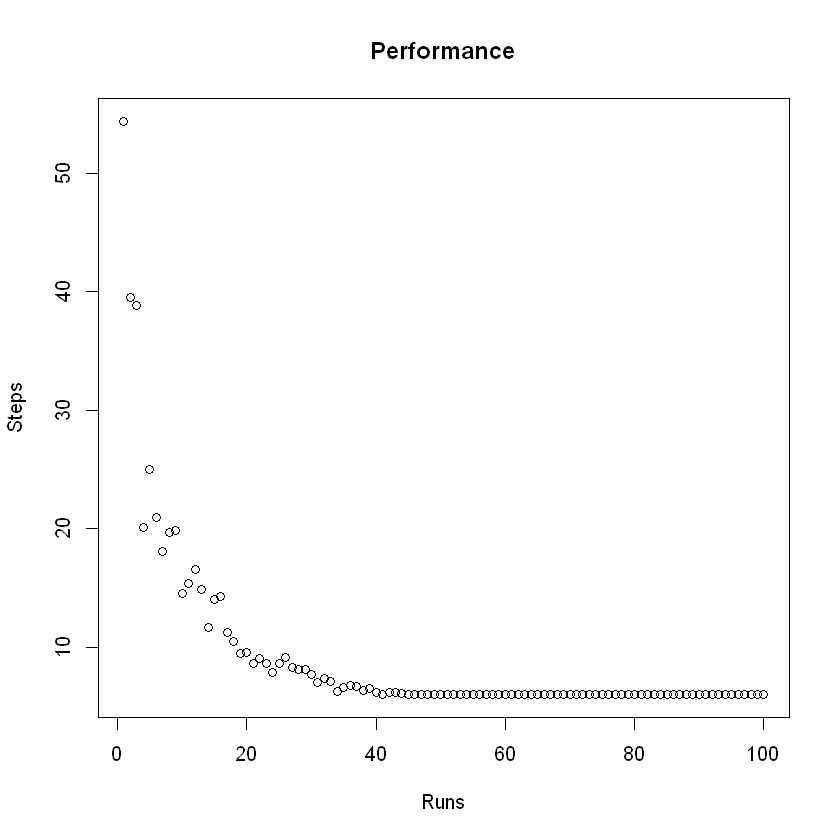

In [67]:
# plotting performance
plot(1:nRun, apply(movecounter, c(1), mean), xlab = "Runs", ylab = "Steps", main="Performance",)

Finally, we can also have a look at the policy of our agents.

Plotting the policy

In [68]:
actions2plot <- c("left ", " up  ", "right", "down ")


a = apply(Qall, c(1,2), mean)
b = apply(a, c(1), which.max)
dim(b) = c(grid_size,grid_size)

#print(a)

print("policy for recent agent")
for (i in 1:grid_size) {
  cat('|')
  for (j in 1:grid_size) {
    if (states[i,j]==s_0) {
      cat(paste('*',actions2plot[b[i,j]],'*|'))
    } else if (states[i,j]==s_terminal) {
      cat(paste('+',actions2plot[b[i,j]],'+|'))
    } else {
      cat(paste(' ',actions2plot[b[i,j]],' |'))
    }
  }
  print('')
}

[1] "policy for recent agent"
|* down  *|  down   |  down   |  down   |[1] ""
|  right  |  down   |  down   |  down   |[1] ""
|  right  |  right  |  down   |  down   |[1] ""
|  right  |  right  |  right  |+ left  +|[1] ""


**Excercise 3.** So far, we have only investigated the softmax and random method for action selection, with random action selection being a special case of softmax action selection. Try to implement alternative methods, such as greedy or e-greedy and have a look how performance changes. 

**Excercise 4.** The current grid world is perfectly deterministic. Actions reliably lead to the same outcome. Reward is always hidden in the same location. Recall that for our bandit example reward delivery was probabilistic. Can you implement some randomness in the grid world as well? Think about a few possible options. How could you implement those and what would be the consequences for agents' learning and decision-making?

**Excercise 5.** (optional) Although we have only discussed different decision rules at this point, we could also think about different learning rules. A prominent example is already described in Sutton & Barto (2018, p132). In their variant of the grid world, learning for the different learning rules translates into very distinct behavioral patterns. It nicely illustrates how small changes in the algorithm can have quite strong effects on decision making. Have a look at the example. Can you construct a cliff world and replicate the findings reported by Sutton & Barto?      